# Donnée textuelles - Partie 1

Comme nous l'avons vu précédemment, les algorithmes utilisés en ML demandent que les entrées soient sous formes numériques, qu'il s'agisse des données elles-mêmes ou des classes. Pour cette raison, nous avons dans le cours précédent encodés numériquement les classes de variété d'iris, tout en créant un mapping permettant de faire correspondre le nom de chaque variété à sa forme numérique.

Cependant, s'il est relativement aisé d'encoder un ensemble de noms de classes, qui sont alors en nombre fini, quand est-il de données textuelles brutes, tel que des avis, des romans ou des articles ? Comment peut-on représenter la sémantique ou la syntaxe d'un texte de manière numérique ? Une grande partie des recherches en TAL (ou NLP) du point de vue du Machine Learning consiste à trouver de nouvelles méthodes pour répondre à cette problématique.

Dans ce cours, nous allons voir les premières méthodes utilisés pour encoder des données textuelles, ce qui nous permettra de traiter un problème d'analyse de sentiment, qui est un cas récurrent de classification en TAL.

---

Nous allons travailler à partir de la version française du ``amazon_reviews`` dataset. Contrairement aux datasets que nous avons utilisés précédemment, celui-ci est déjà divisé en train, validation et test sets. Ceux-ci sont enregistrés au format JSON, mais nous pouvons tout de même les ouvrir avec ``pandas``:

### Importer les données

In [1]:
import pandas as pd
trainset = pd.read_json('data/amazon_reviews/fr/train/dataset_fr_train.json', lines=True)
devset = pd.read_json('data/amazon_reviews/fr/dev/dataset_fr_dev.json', lines=True)
testset = pd.read_json('data/amazon_reviews/fr/test/dataset_fr_test.json', lines=True)

In [2]:
trainset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0424335,product_fr_0297678,reviewer_fr_0961886,1,A déconseiller - Article n'a fonctionné qu'une...,Brumisateur à pompe,fr,beauty
1,fr_0452615,product_fr_0613288,reviewer_fr_0857499,1,Si vous voulez être déçu achetez le produit ! ...,Insatisfaisant,fr,baby_product
2,fr_0407673,product_fr_0571250,reviewer_fr_0383240,1,"Écran de mauvaise qualité, car il s'use en peu...",Ne recommande pas,fr,pc
3,fr_0579191,product_fr_0030168,reviewer_fr_0729693,1,Cet engin ne sert à rien les sons sont pourris...,A éviter!,fr,musical_instruments
4,fr_0931533,product_fr_0468261,reviewer_fr_0734066,1,Très beau produit mais la grue n'a pas fonctio...,Déçue,fr,toy


Ce dataset regroupe les avis laissés par les acheteurs sur Amazon. Il est intéressant puisque chaque avis est associé à plusieurs catégories, ce qui permet d'utiliser ce dataset pour différents problèmes. Ici, la note laissée par l'acheteur pour un produit est indiquée dans la colonne 'stars' et exprime sa satisfaction quant au produit. 

Pour résoudre notre problématique d'analyse de sentiments, nous n'allons garder que les colonnes review_body et stars, que nous renommerons 'texts' et 'classes'. Il nous faudra appliquer ce filtre aux trois datasets (train, dev et test). Nous allons donc écrire une fonction pour appliquer le même filtrage facilement:

### Filtrer et renommer les données

In [2]:
def filter_df(df, list_columns):
    """
    Retourne le DataFrame avec uniquement les colonnes demandées
    """
    filtered_df = df[list_columns]
    return filtered_df

In [3]:
keep_col = ['review_body', 'stars'] # liste des colonnes que l'on souhaite garder
train = filter_df(trainset, keep_col) 
dev = filter_df(devset, keep_col)
test = filter_df(testset, keep_col)
train.head() # on visualise les premieres lignes du df 

,review_body,stars
0,A déconseiller - Article n'a fonctionné qu'une...,1
1,Si vous voulez être déçu achetez le produit ! ...,1
2,"Écran de mauvaise qualité, car il s'use en peu...",1
3,Cet engin ne sert à rien les sons sont pourris...,1
4,Très beau produit mais la grue n'a pas fonctio...,1


Nous allons créer une fonction pour renommer automatiquement les colonnes de la même façon sur les trois datasets:

In [4]:
def rename_columns(df, list_rename):
    """
    Retourne un DF avec les noms de colonnes changées par celles de list_rename
    """
    df.columns = list_rename
    return df

In [5]:
list_rename = ['texts', 'classes']
train = rename_columns(train, list_rename)
dev = rename_columns(dev, list_rename)
test = rename_columns(test, list_rename)
train.head()

,texts,classes
0,A déconseiller - Article n'a fonctionné qu'une...,1
1,Si vous voulez être déçu achetez le produit ! ...,1
2,"Écran de mauvaise qualité, car il s'use en peu...",1
3,Cet engin ne sert à rien les sons sont pourris...,1
4,Très beau produit mais la grue n'a pas fonctio...,1


## Visualisation des classes

Comme on peut le voir ci-dessus, les classes sont déjà sous forme numérique: il n'y a donc pas besoin d'utiliser le ``LabelEncoder`` de ``scikit-learn`` pour transformer les noms des classes. Cependant, il est toujours important de visualiser la distribution des classes, afin de s'assurer que certaines classes soient déséquilibrées:

## Exercice

Produisez un diagramme à barres pour visualiser la répartition de chaque classes, puis interprétez le résultat:

In [ ]:
## Exercice


<AxesSubplot:>

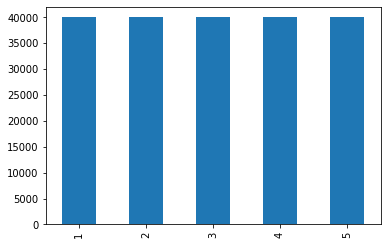

In [7]:
train.classes.value_counts().plot.bar()

Avec le diagramme ci-dessus, on constate qu'il y a 40 000 exemples pour chaque classe, ce qui fait qu'elles sont équilibrées.

Puisque nous venons d'effectuer un certain nombre d'étapes de prétraitement, et que l'on aura sans doute besoin de réutiliser ces données, nous allons sauvegarder ces trois DataFrame sur le disque afin de pouvoir les charger sans avoir à appliquer de nouveaux ces prétraitements:

In [6]:
# ici on précise index = None pour éviter que l'index ne soit conservé
# comme une colonne du fichier
import os

if not os.path.exists('data/multiclass'):
    os.mkdir('data/multiclass')
train.to_csv('data/multiclass/as_train.csv', index = None)
dev.to_csv('data/multiclass/as_dev.csv', index = None)
test.to_csv('data/multiclass/as_test.csv', index = None)

KeyboardInterrupt: 

## Réduction du nombre de classes

La classification multiclasses en TAL peut être une tâche compliquées. A moins d'utiliser des techniques plus avancées, il est difficile d'obtenir de bons résultats lors de l'entraînement. Nous allons donc transformer légèrement ce dataset de telle sorte à n'avoir que deux classes: positif et négatif.

Notre dataset est composé de 5 classes: **Très mauvais** (1), **Mauvais** (2), **Neutre** (3), **Bon** (4), **Très bon** (5). Pour le réduire à deux classes nous allons regrouper les classes 1 et 2 dans 'Négatif', les classes 4 et 5 dans 'Positif' et supprimer la classe 3 (étant neutre, on ne peut facilement l'assimiler à l'une des deux autres classes).

Pour remplacer un ensemble de données dans un DataFrame, on peut utiliser la fonction ``replace``. Celle-ci prend en entrée une liste de données à remplacer et une liste de même taille des nouvelles données:

In [7]:
def replace_values(df, col, old_data, new_data):
    """
    Remplace old_data par new_data dans colonne col du DataFrame df
    """
    df[col].replace(old_data, new_data, inplace = True)
    return df

In [8]:
old_data = [1, 2, 4, 5] # classes que l'on souhaite remplacer
new_data = [0, 0, 1, 1] # valeurs respectives par lesquelles on remplace

bi_train = replace_values(train, 'classes', old_data, new_data)
bi_dev = replace_values(dev, 'classes', old_data, new_data)
bi_test = replace_values(test, 'classes', old_data, new_data)

bi_train.head()

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,texts,classes
0,A déconseiller - Article n'a fonctionné qu'une...,0
1,Si vous voulez être déçu achetez le produit ! ...,0
2,"Écran de mauvaise qualité, car il s'use en peu...",0
3,Cet engin ne sert à rien les sons sont pourris...,0
4,Très beau produit mais la grue n'a pas fonctio...,0


<AxesSubplot:>

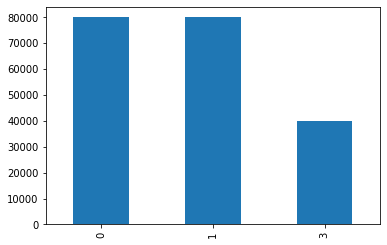

In [9]:
bi_train.classes.value_counts().plot.bar()

### Supprimer les valeurs neutres

Ci-dessous, on filtre le DataFrame de telle sorte à ne conserver que les lignes pour lesquelles la valeur de 'classes' est tout sauf 3:

In [10]:
bi_train = bi_train[bi_train['classes'] != 3]
bi_dev = bi_dev[bi_dev['classes'] != 3]
bi_test = bi_test[bi_test['classes'] != 3]

In [11]:
bi_train['classes'].value_counts()

0    80000
1    80000
Name: classes, dtype: int64

<AxesSubplot:>

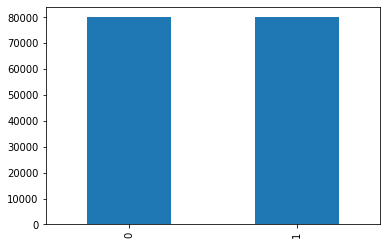

In [12]:
bi_train.classes.value_counts().plot.bar()

A nouveau, nous allons sauvegarder sur le disque ces fichiers de telle sorte à pouvoir réutiliser ces données sans effectuer à nouveau les prétraitements:

In [15]:
import os

if not os.path.exists('data/binary'):
    os.mkdir('data/binary')
bi_train.to_csv('data/binary/bi_as_train.csv', index = None)
bi_dev.to_csv('data/binary/bi_as_dev.csv', index = None)
bi_test.to_csv('data/binary/bi_as_test.csv', index = None)

### Note

Bien que l'analyse de sentiment soit le problème de base pour la classification en TAL, il s'agit en vérité d'un problème loin d'être trivial. Si cette tâche est relativement aisée avec deux classes, il suffit d'en ajouter une troisième (généralement neutre) pour baisser drastiquement les résultats.

## Feature Extraction

Comme nous l'avons vu au début de ce cours, chaque dataset est composé de ``samples`` (lignes) et de ``features`` (colonnes). Ces features doivent être au format numérique pour pouvoir être utilisées par les algorithmes. Cependant, notre colonne ``text`` n'est pas en soit une feature puisqu'on ne peut l'utiliser tel quel.  Il faut donc trouver un moyen d'extraire les caractéristiques de cette colonne. En Machine-Learning, cette étape est appelée ``Feature-Extraction``, et est une étape cruciale dans le processus d'entraînement d'un modèle.

## Bag-of-Words

Une des plus simples méthodes de Feature-Extraction pour le texte est la méthode dite du ``Bag-of-Words``. Cette méthode ne s'intéresse qu'aux mots eux-mêmes, sans se préoccuper des paragraphes ou de la syntaxe. Elle consiste pour un ensemble de documents donné à compter le nombre d'occurrences de chaque mot. En se débarassant de la syntaxe ou de l'organisation des textes, on consitue donc un ``sac de mots`` contenant un vocabulaire, c'est-à-dire un ensemble fini de mots. On peut alors représenter chaque document par le nombre d'occurrences de chaque mot qu'il contient.

Etablir un sac de mots se réalise en trois étapes:

* La tokenization
* La constitution du vocabulaire
* L'encodage

Pour démontrer ces trois étapes, nous allons utiliser le faux corpus ci-dessous:

In [13]:
corpus = ['Un anneau pour les gouverner tous.', 
          'Un anneau pour les trouver.', 
          'Un anneau pour les amener tous et dans les ténèbres les lier.']

## Tokenization

La tokenization est le processus consistant à transformer une ou plusieurs chaînes de caractères continues en un ensemble d'unités distinctes. L'unité ainsi obtenue est appelée token. Grâce à la tokenization, il devient possible de traitrer indépendemment chaque unité d'un texte, facilitant ainsi leur encodage.

Généralement, l'unité choisie est le mot (plus exactement l'unité lexicale), mais on peut également tokenizer à des niveaux plus fins, comme celui des sous-mots ou des caractères.


```
"La batterie est arrivée cassée au niveau de la nappe de connexion."

Mot : ['La', 'batterie', 'est', 'arrivée', 'cassée', 'au', 'niveau', 'de', 'la', 'nappe', 'de', 'connexion']

Sous-mot : ['La', 'batterie', 'est', 'arriv', '##ée', 'cass', '##ée', 'au', 'niveau', 'de', 'la', 'nappe', 'de', 'connexion']

Caractères : ['L', 'a', 'b', 'a', 't', 't', 'e', 'r', 'i', 'e', ...]

```

Tokenizer est une tâche loin d'être triviale: on ne peut en effet pas simplement diviser les phrases aux niveaux des espaces seulements. Il suffit de prendre la phrase ci-dessus pour s'en rendre compte:


``Y-a-t-il de nouveaux arrivants?``

Si l'on divise aux espaces simplements, on obtient ``['Y-a-t-il', 'de', 'nouveaux', 'arrivants?']``. On vient donc bien qu'il y-a au moins trois unités lexicales distinctes dans le premier token, et deux dans le dernier token. Ainsi, tokenizer demande de prendre en compte les différents signes graphiques et les particularités de chaque langues pour être efficace. 

On reviendra plus en détails sur la tokenization, qui est un sujet d'études à part entière en NLP. Dans l'immédiat et de manière générale, on peut se contenter de tokenizer au niveau des mots. De plus, des outils comme Spacy, OpenNLP ou torchtext proposent des tokenizer très performants. Ainsi, à moins de ne travailler sur une langue ou un problème bien particulier, il est recommandé d'utiliser les outils déjà existants.

Au vu de la simplicité de notre corpus, nous nous contenterons de tokenizer au niveaux des espaces entre les mots, avec la fonction ci-dessous:

In [14]:
def tokenize(text):
    """
    Tokenize en splittant le text au niveau des espaces. Retourne une liste.
    """
    split_text = text.split()
    
    return split_text

In [15]:
tokenized_corpus = []
for doc in corpus: # pour chaque document
    print("Doc :", doc)
    split_doc = tokenize(doc) # on tokenize le document
    print("Split doc :", split_doc)
    tokenized_corpus.append(split_doc) # on l'ajoute a la liste


Doc : Un anneau pour les gouverner tous.
Split doc : ['Un', 'anneau', 'pour', 'les', 'gouverner', 'tous.']
Doc : Un anneau pour les trouver.
Split doc : ['Un', 'anneau', 'pour', 'les', 'trouver.']
Doc : Un anneau pour les amener tous et dans les ténèbres les lier.
Split doc : ['Un', 'anneau', 'pour', 'les', 'amener', 'tous', 'et', 'dans', 'les', 'ténèbres', 'les', 'lier.']


### Constituer le vocabulaire

Un vocabulaire, ou lexique, est un ensemble fini de mots. Ce vocabulaire sera notre véritable sac de mot qui nous servira de référence pour encoder nos documents. 

Lorsqu'on utilise la méthode de sac de mots, chaque mot du vocabulaire devient une des features que l'on utilise pour entraîner le modèle. Ainsi, si l'on a 40 000 samples dans notre dataset, et que notre vocabulaire contient 10 000 mots, on a donc une matrice de ``(40 000 x 10 000)``.

Pour créer ce vocabulaire en Python, il nous suffit d'utiliser le type set() et d'y ajouter chaque mot contenu dans nos documents:

In [16]:
vocabulary = set()
for doc in tokenized_corpus:
  vocabulary.update(doc)

print("Vocabulaire :", vocabulary)
print("Taille du vocabulaire :", len(vocabulary))

Vocabulaire : {'tous.', 'les', 'pour', 'ténèbres', 'trouver.', 'amener', 'tous', 'dans', 'lier.', 'et', 'Un', 'gouverner', 'anneau'}
Taille du vocabulaire : 13


Pour simplifier, nous allons créer un DataFrame contenant ce corpus ainsi que ce vocabulaire:

## Encodage

Dans le modèle de sac de mots, l'étape d'encodage va consister à associer une valeur numérique à chaque token contenu dans le document que l'on traite. Cette valeur numérique diffère selon la méthode d'encodage que l'on choisit. Ainsi pour chaque mot du vocabulaire, on peut:

1. indiquer si celui-ci est présent (1) ou non (0) dans le document
2. indiquer sa fréquence d'apparition, c'est-à-dire combien de fois celui-ci apparaît dans le document
3. indiquer son poids par rapport aux documents et aux autre mots du vocabulaire (ce qui correspond à la méthode TF-IDF)

### 1- Présence / Abscence du mot (One-Hot encoding)

In [17]:
print("Vocabulaire :", vocabulary)
data = []
for i, doc in enumerate(tokenized_corpus):
    print("Doc :", " ".join(doc))
    vocab_count = []
    for x in vocabulary:
        if x in doc:
            print(f"{x} : 1")
            vocab_count.append(1)
        else:
            print(f"{x} : 0")
            vocab_count.append(0)
    data.append(vocab_count)
    print("\n---\n")
    
binary_df = pd.DataFrame(data = data,
                        columns = list(vocabulary))
binary_df.index = corpus
binary_df.head()

Vocabulaire : {'tous.', 'les', 'pour', 'ténèbres', 'trouver.', 'amener', 'tous', 'dans', 'lier.', 'et', 'Un', 'gouverner', 'anneau'}
Doc : Un anneau pour les gouverner tous.
tous. : 1
les : 1
pour : 1
ténèbres : 0
trouver. : 0
amener : 0
tous : 0
dans : 0
lier. : 0
et : 0
Un : 1
gouverner : 1
anneau : 1

---

Doc : Un anneau pour les trouver.
tous. : 0
les : 1
pour : 1
ténèbres : 0
trouver. : 1
amener : 0
tous : 0
dans : 0
lier. : 0
et : 0
Un : 1
gouverner : 0
anneau : 1

---

Doc : Un anneau pour les amener tous et dans les ténèbres les lier.
tous. : 0
les : 1
pour : 1
ténèbres : 1
trouver. : 0
amener : 1
tous : 1
dans : 1
lier. : 1
et : 1
Un : 1
gouverner : 0
anneau : 1

---



,tous.,les,pour,ténèbres,trouver.,amener,tous,dans,lier.,et,Un,gouverner,anneau
Un anneau pour les gouverner tous.,1,1,1,0,0,0,0,0,0,0,1,1,1
Un anneau pour les trouver.,0,1,1,0,1,0,0,0,0,0,1,0,1
Un anneau pour les amener tous et dans les ténèbres les lier.,0,1,1,1,0,1,1,1,1,1,1,0,1


### 2-Fréquence d'apparition des mots

In [18]:
print("Vocabulaire :", vocabulary)
data = []
for i, doc in enumerate(tokenized_corpus):
    print("Doc :", " ".join(doc))
    vocab_count = []
    for x in vocabulary:
        if x in doc:
            count = doc.count(x)
            print(f"{x} : {count}")
            vocab_count.append(count)
        else:
            print(f"{x} : 0")
            vocab_count.append(0)
    data.append(vocab_count)
    print("\n---\n")
    
freq_df = pd.DataFrame(data = data,
                        columns = list(vocabulary))
freq_df.index = corpus
freq_df.head()

Vocabulaire : {'tous.', 'les', 'pour', 'ténèbres', 'trouver.', 'amener', 'tous', 'dans', 'lier.', 'et', 'Un', 'gouverner', 'anneau'}
Doc : Un anneau pour les gouverner tous.
tous. : 1
les : 1
pour : 1
ténèbres : 0
trouver. : 0
amener : 0
tous : 0
dans : 0
lier. : 0
et : 0
Un : 1
gouverner : 1
anneau : 1

---

Doc : Un anneau pour les trouver.
tous. : 0
les : 1
pour : 1
ténèbres : 0
trouver. : 1
amener : 0
tous : 0
dans : 0
lier. : 0
et : 0
Un : 1
gouverner : 0
anneau : 1

---

Doc : Un anneau pour les amener tous et dans les ténèbres les lier.
tous. : 0
les : 3
pour : 1
ténèbres : 1
trouver. : 0
amener : 1
tous : 1
dans : 1
lier. : 1
et : 1
Un : 1
gouverner : 0
anneau : 1

---



,tous.,les,pour,ténèbres,trouver.,amener,tous,dans,lier.,et,Un,gouverner,anneau
Un anneau pour les gouverner tous.,1,1,1,0,0,0,0,0,0,0,1,1,1
Un anneau pour les trouver.,0,1,1,0,1,0,0,0,0,0,1,0,1
Un anneau pour les amener tous et dans les ténèbres les lier.,0,3,1,1,0,1,1,1,1,1,1,0,1


### Note

En regardant le vocabulaire ci-dessus, on peut déjà voir les soucis que peut poser une simple tokenization en divisant le texte au niveau des espaces: Ici, on voit les mots ``[lier., trouver., tous.]`` suivis d'un point, alors qu'il ne devrait pas y être. 

De même, on voit le mot ``Un`` avec une majuscule: ainsi, si l'on avait eu le mot ``un`` sans majuscule, celui-ci aurait compté comme un autre token. Ceci montre l'importance de normaliser sont corpus avant de le tokenizer. Nous reviendrons plus tard sur les différentes méthodes de normalisation.

Enfin, on peut voir que les mots les plus fréquents ou qui apparraissent systématiquement dans les trois documents sont des mots vides tels que ``[les, dans, Un, et, pour]``. Ces mots-vides, que l'on appelle également ``stopwords``, sont ceux qui apparaissent le plus fréquemment dans un corpus et donc par conséquent, sont ceux qui apportent le moins d'information (selon la loi de Zipf). Supprimer ces mots-vides du vocabulaire est généralement nécessaire afin d'en réduire la taille et ainsi conserver de l'espace mémoire. Nous reviendrons également sur cette notion plus tard.

## CountVectorizer

Bien que l'on puisse implémenter nous-même les étapes précédentes, cela peut devenir laborieux si l'on répète l'opération régulièrement, sans compter si l'on traite des corpus bien plus grands que notre faux corpus. Ainsi, on peut utiliser l'objet ``CountVectorizer`` de ``scikit-learn`` pour réaliser les mêmes opérations et plus encore:

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

Comme le ``LabelEncoder``, le ``CountVectorizer`` est un transformer: il possède une fonction ``fit()`` lui permettant de s'adapter aux données ainsi qu'une fonction ``transform()`` lui permettant de transformer ces données sous une autre forme. 

Ici, ``CountVectorizer()`` permet de transformer un corpus de texte en vecteurs d'occurrences de mots, comme nous l'avons fait précédemment:

In [24]:
vectorizer.fit(corpus)
X = vectorizer.transform(corpus)

In [25]:
X

<3x12 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [26]:
X.toarray()

array([[0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 1, 1, 1, 0, 3, 1, 1, 1, 0, 1, 1]])

In [23]:
vectorizer.fit(corpus)
X = vectorizer.transform(corpus)

# on peut reduire les deux dernieres lignes en une seule :
# X = vectorizer.fit_transform(corpus)

print("Vocabulary : ", vectorizer.get_feature_names_out())
print("Matrice d'occurrences :")
# print(X.toarray())

vec_df = pd.DataFrame(data = X.toarray(),
                        columns = vectorizer.get_feature_names_out())
vec_df.index = corpus
vec_df.head()

Vocabulary :  ['amener' 'anneau' 'dans' 'et' 'gouverner' 'les' 'lier' 'pour' 'tous'
 'trouver' 'ténèbres' 'un']
Matrice d'occurrences :


,amener,anneau,dans,et,gouverner,les,lier,pour,tous,trouver,ténèbres,un
Un anneau pour les gouverner tous.,0,1,0,0,1,1,0,1,1,0,0,1
Un anneau pour les trouver.,0,1,0,0,0,1,0,1,0,1,0,1
Un anneau pour les amener tous et dans les ténèbres les lier.,1,1,1,1,0,3,1,1,1,0,1,1


### Note

Si l'on regarde le vocabulaire plus haut, on peut voir que cette fois, il n'y a pas de point aux mots ``[lier, trouver, tous]``, contrairement à ce que l'on a fait plus haut. De même, le mot ``Un`` apparaît ici en minuscule.

``CountVectorizer`` se charge lui-même de la tokenization, pour laquelle il prend en charge certains aspects de prétraitement, comme la suppression des ponctuations ou le passage de l'intégrité du texte en minuscule. Nous verrons plus tard comment adapter ces paramètres.

Maintenant que nous savons comment encoder des données textuelles en vecteurs, nous pouvons appliquer cette méthode à l'ensemble du ``amazon-reviews`` (train, dev et test sets compris). Pour s'assurer que chaque dataset soit traité de la même façon, nous allons d'abord entraîner le ``CountVectorizer`` puis écrire une fonction permettant de transformer les données de la même manière:

### Concaténer les données et entraîner

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

data = pd.concat([bi_train['texts'], bi_dev['texts'], 
                  bi_test['texts']])
# fit_transform regroupe les deux étapes fit et transform en une seule
vectorizer.fit(data) 

CountVectorizer()

In [28]:
data

0       A déconseiller - Article n'a fonctionné qu'une...
1       Si vous voulez être déçu achetez le produit ! ...
2       Écran de mauvaise qualité, car il s'use en peu...
3       Cet engin ne sert à rien les sons sont pourris...
4       Très beau produit mais la grue n'a pas fonctio...
                              ...                        
4995    Pour le prix ça le fait, bon bracelet de rempl...
4996    parfait rien a dire c est comme au cinéma je r...
4997    compteur vraiment très bien ........ pour occu...
4998    J'ai reçu cette guirlande led dans les temps e...
4999                  Excellent produit... (Fait le job).
Name: texts, Length: 168000, dtype: object

### Transformer les données

In [29]:

X_train= vectorizer.transform(bi_train['texts'])
y_train =  bi_train['classes']
print("Forme de la matrice :", X_train.shape)

X_dev = vectorizer.transform(bi_dev['texts'])
y_dev = bi_dev['classes']
print("Forme de la matrice :", X_dev.shape)

X_test = vectorizer.transform(bi_test['texts'])
y_test = bi_test['classes']
print("Forme de la matrice :", X_test.shape)

Forme de la matrice : (160000, 48768)
Forme de la matrice : (4000, 48768)
Forme de la matrice : (4000, 48768)


Nous pouvons maintenant utiliser ces données numériques de la même manière que les données que nous avions pour le ``iris-dataset``, et les donner en entrée à un algorithme tel que KNN our LogisticRegression:

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_dev, y_dev)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.88425

### Sauvegarder un modèle

Maintenant que nous avons entraîné notre modèle, et que nous pouvons être relativement satisfaits des résultats, il ne nous reste plus qu'à le sauvegarder sur le disque, afin de pouvoir plus tard le charger et l'utiliser dans d'autres programmes. 

Attention, puisque l'on a également entraîné un ``CountVectorizer`` pour encoder nos documents, il ne faut pas oublier de le sauvegarder également, afin de pouvoir encoder de futures données.

Les modèles entraînés avec ``scikit-learn`` peuvent être sauvegardés à l'aide de ``pickle`` ou ``joblib``. ``pickle`` et ``joblib`` sont deux librairies permettant de sauvegarder des données au format binaire sur le disques. Historiquement, joblib** est plus adapté pour sauvegarder de grosses masses de données, même si la différence n'est plus tout à fait vraie aujourd'hui. Cependant, sauvegarder un fichier avec **joblib** est syntaxiquement plus léger qu'avec **pickle**.

Voir la documentation de scikit-learn pour plus d'exemples : https://scikit-learn.org/stable/modules/model_persistence.html

In [28]:
from joblib import dump

save_path = 'data/logreg_model'
if not os.path.exists(save_path):
    os.mkdir(save_path)
    
dump(vectorizer, f"{save_path}/vectorizer.joblib")
dump(lr, f'{save_path}/model.joblib')

['data/logreg_model/model.joblib']

## Références

Feature-extraction ne concerne pas que le traitement des données textuelles: elle concerne le traitement de n'importe quel type de features. On peut ainsi répartir les valeurs d'une colonne en trois colonnes ou à l'inverse, réduire le nombre de colonnes utilisées. A DVLP

* https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be